<a href="https://colab.research.google.com/github/pttrupt/EDA-on-Google-play-store-apps-/blob/main/EDA_on_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Play Store Apps Exploratory Data Analysis 

ToDo - talk about EDA 

ToDo - talk about dataset(Source, information)
* Kaggle 
* information about applications 


## Download the Dataset

- Dataset URL: https://www.kaggle.com/gauthamp10/google-playstore-apps  

In [1]:
!pip install opendatasets --upgrade -q

In [2]:
import opendatasets as od 

download_url = 'https://www.kaggle.com/gauthamp10/google-playstore-apps'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pttrupt
Your Kaggle Key: ··········


100%|██████████| 207M/207M [00:06<00:00, 32.3MB/s]


In [3]:
data_file = './google-playstore-apps/Google-Playstore.csv'

## Data Table Display 

- Enables the Interactive Displays to Panadas DataFrame for Sorting, Filtering and Explore Dynamically 


In [4]:
pip install google.colab -q

In [5]:
from google.colab import data_table

In [ ]:
data_table.enable_dataframe_formatter()

## Data Preparation and cleaning 

* Load the file using Pandas 
* Look for information about the data 
* fix incorrect values and any missing values 




In [7]:
import pandas as pd 
import numpy as np

In [6]:
# convert csv file into Pandas DataFrame 
df = pd.read_csv(data_file)

NameError: ignored

In [ ]:
# set options to show the all columns of DataFrame 
pd.options.display.max_columns = len(df.columns)

In [ ]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [ ]:
df.shape

(2312944, 24)

In [ ]:
# convert columns to best dtypes (data-types)
df = df.convert_dtypes() 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           string 
 1   App Id             string 
 2   Category           string 
 3   Rating             float64
 4   Rating Count       Int64  
 5   Installs           string 
 6   Minimum Installs   Int64  
 7   Maximum Installs   Int64  
 8   Free               boolean
 9   Price              float64
 10  Currency           string 
 11  Size               string 
 12  Minimum Android    string 
 13  Developer Id       string 
 14  Developer Website  string 
 15  Developer Email    string 
 16  Released           string 
 17  Last Updated       string 
 18  Content Rating     string 
 19  Privacy Policy     string 
 20  Ad Supported       boolean
 21  In App Purchases   boolean
 22  Editors Choice     boolean
 23  Scraped Time       string 
dtypes: Int64(3), boolean(4), float64(2), string(15)
me


* Columns like 
   - App Id
   - Developer Email
   -  Developer Website
   - Privacy policy 
   -  Scraped Time 

  which are not that much useful for our Exploratory Analysis so we'll drop those columns. 

In [ ]:
df.drop(columns = ['App Id', 'Developer Email', 'Privacy Policy', 'Developer Website', 'Scraped Time'], inplace=True)

In [ ]:
df.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Released', 'Last Updated',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

In [ ]:
# Calculating percentage of missing data for each column
df.isnull().sum()* 100 / df.shape[0] 

App Name            0.000086
Category            0.000000
Rating              0.989345
Rating Count        0.989345
Installs            0.004626
Minimum Installs    0.004626
Maximum Installs    0.000000
Free                0.000000
Price               0.000000
Currency            0.005837
Size                0.008474
Minimum Android     0.282324
Developer Id        0.001427
Released            3.071972
Last Updated        0.000000
Content Rating      0.000000
Ad Supported        0.000000
In App Purchases    0.000000
Editors Choice      0.000000
dtype: float64

- It is fair to say that not much of data is missing, also if it does then it is around 1% at most other than 'Released' column.
- Since 'Released' column contains date of the released app so we don't have way to fill those value. 
  
So here we are going to drop those rows which contains missing values in any columns. Although there are many ways to fill missing values but we are going to do here because we don't have that much missing values. 

In [ ]:
# Drop the missing values
df = df.dropna(axis=0)

- Columns like 'Released' and 'Last Updated' have dates init but it is of the string type.

In [ ]:
### converting columns "Released" and "last updated" into datetime data type

df["Released"] = pd.to_datetime(df["Released"], format='%b %d, %Y')
df["Last Updated"] = pd.to_datetime(df["Last Updated"], format='%b %d, %Y')

In [ ]:
df.describe() # returns stastical table containing 5 number summary statstics of numerical columns

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [ ]:
df['Developer Id'].value_counts()

Subsplash Inc      5422
TRAINERIZE         5153
ChowNow            4865
OrderYOYO          2884
Phorest            2821
                   ... 
Thirsty's             1
CBSEDELHI             1
Vivas Medica BV       1
FlowChief GmbH        1
Zo Games              1
Name: Developer Id, Length: 758371, dtype: Int64

In [ ]:
df_mean = df.groupby(by='Category').agg(np.mean)

## Exploratory Analysis and Visualization 

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline 

### Top 10 Category in terms of total number of apps

In [ ]:
cat = df['Category'].value_counts(sort=True)

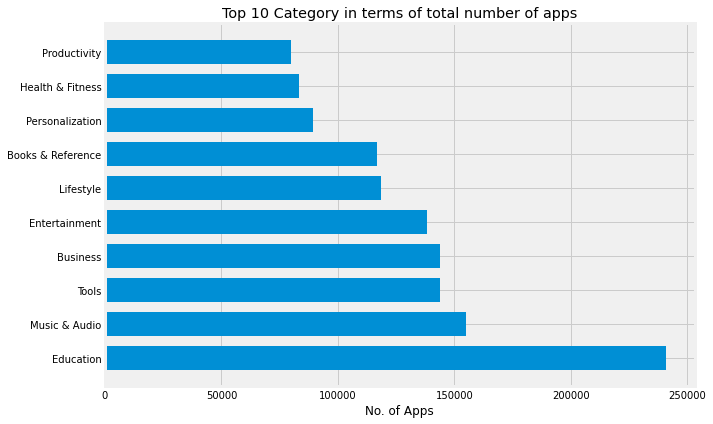

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(y = cat.index[:10], width=cat[:10], height=0.7)
plt.title("Top 10 Category in terms of total number of apps")
plt.xlabel("No. of Apps")
plt.tight_layout()
# plt.xticks(rotation=25)
plt.show()


### No. Editors choice apps per category 

In [ ]:
editor_choice = df.groupby(by='Category')['Editors Choice'].agg(np.sum)
editor_choice.sort_values(ascending=False, inplace=True)

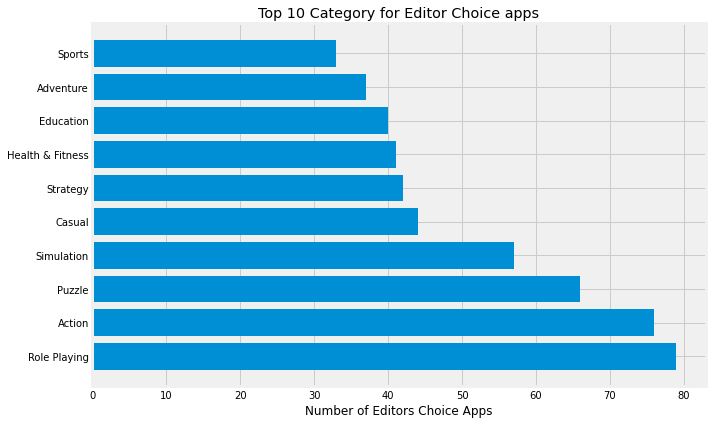

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(y=editor_choice.index[:10], width=editor_choice[:10])
plt.title("Top 10 Category for Editor Choice apps")
plt.xlabel("Number of Editors Choice Apps")
plt.tight_layout()
plt.show()

### Installs 

By lookings closly to dataset, we assume that following three columns are highly co-related.
- installls 
- Minimum Installs 
- Maximum Installs 

Checking the corelations between three install columns 

In [ ]:
df['Installs'] = df['Installs'].str.rstrip('+')
# indexes where Install column has Null value
inst_null_idx = df[df['Installs'].isnull()].index
df.loc[inst_null_idx, 'Installs'] = df.loc[inst_null_idx, 'Maximum Installs'].astype('str')
df['Installs'] = df['Installs'].apply(lambda x:x.replace(',', '')).astype('int')

In [ ]:
mini_null_idx = df[df['Minimum Installs'].isnull()].index 
# indexes where Minimun Install column has Null value 
df.loc[mini_null_idx, 'Minimum Installs'] = df.loc[mini_null_idx, 'Maximum Installs']

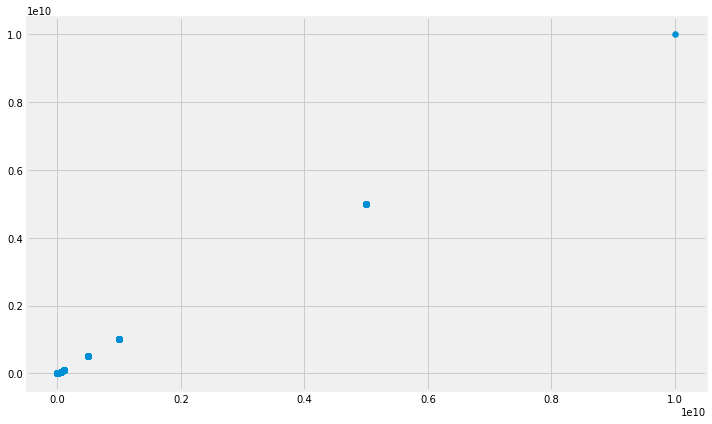

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Installs'], y=df['Minimum Installs'])
plt.tight_layout()
plt.show()

- Though we replaced on about 0.004626%  missing values with the maximum installs, we can see the storng positive corelation but it is still not that much clear, we take look at all those values which less than 2e5.

In [ ]:
less_install = df[df['Installs']<2e5]['Installs']
less_mininum = df[df['Minimum Installs']<2e5]['Minimum Installs']

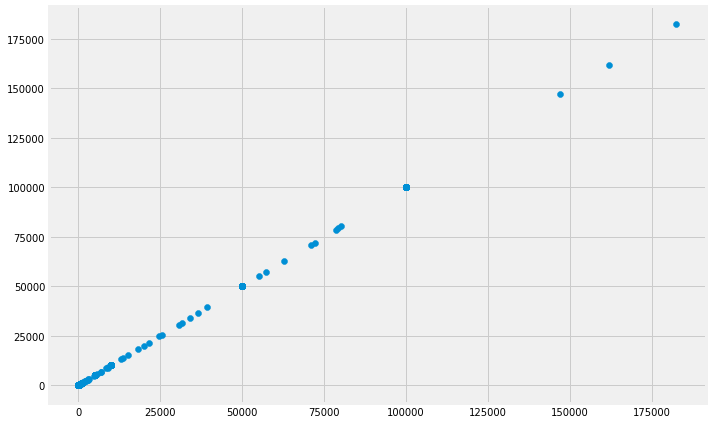

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=less_install, y=less_mininum)
plt.tight_layout()
plt.show()

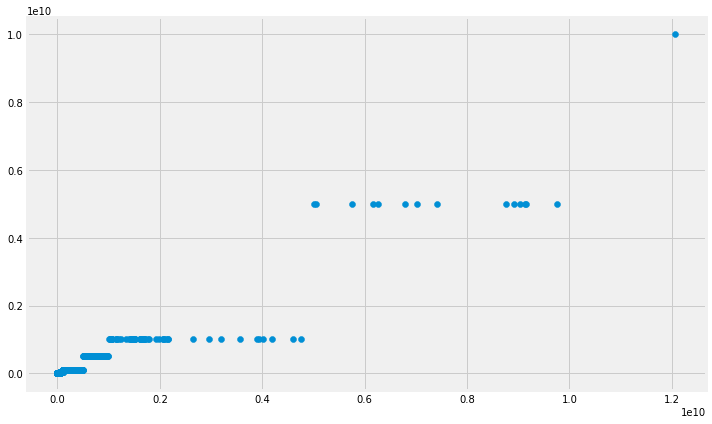

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=df['Maximum Installs'], y=df['Minimum Installs'])
plt.tight_layout()
plt.show()

In [ ]:
df['Install No.'] = (df['Minimum Installs'] + df['Maximum Installs'])/2

In [ ]:
df = df.drop(columns=['Installs', 'Maximum Installs', 'Minimum Installs'])

In [ ]:
df.head()

,App Name,Category,Rating,Rating Count,Free,Price,Currency,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Install No.
0,Gakondo,Adventure,0.0,0,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,12.5
1,Ampere Battery Info,Tools,4.4,64,True,0.0,USD,2.9M,5.0 and up,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False,6331.0
2,Vibook,Productivity,0.0,0,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,54.0
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,14.5
4,GROW.me,Tools,0.0,0,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,289.0


### Paid Apps, Free apps 

In [ ]:
Free_apps= df['Free'].value_counts()
Free_apps

True     2191361
False      43917
Name: Free, dtype: Int64

([<matplotlib.axis.XTick at 0x7f6633733c10>,
 [Text(0, 0, 'False'), Text(0, 0, 'True')])

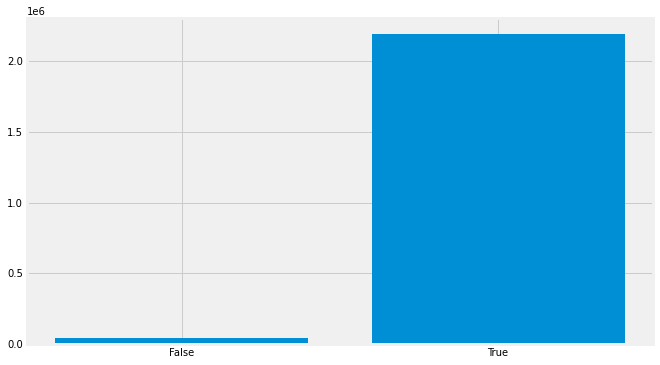

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x=Free_apps.index, height=Free_apps)
plt.xticks(ticks=[0,1], labels=[False, True])

In [ ]:
free_percent = Free_apps * 100 / len(df)
free_percent

True     98.035278
False     1.964722
Name: Free, dtype: float64

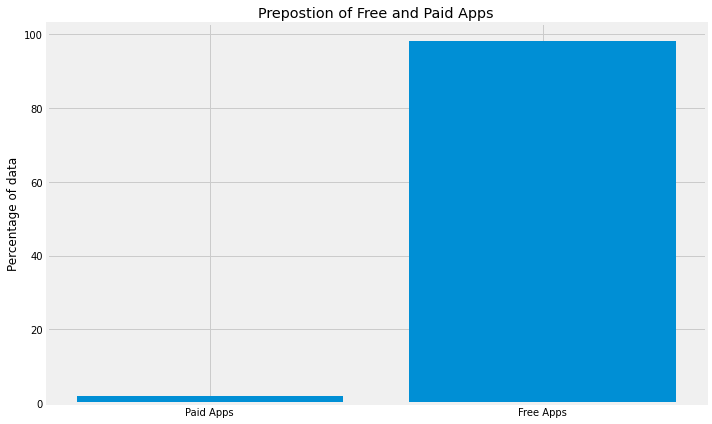

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x=free_percent.index, height=free_percent)
plt.title("Prepostion of Free and Paid Apps")
plt.xticks(ticks=[0,1], labels=["Paid Apps", "Free Apps"])
plt.ylabel('Percentage of data')
plt.tight_layout()
plt.show()

### ratings

In [ ]:
df_mean

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
Category,,,,,,,,,
Action,2.705979,20805.240094,6.316844e+05,1.115665e+06,0.978334,0.066425,0.810524,0.274832,0.002758
Adventure,2.814991,5724.398561,2.323428e+05,4.231656e+05,0.957505,0.179679,0.775546,0.203853,0.001595
Arcade,2.450481,4649.964464,2.695966e+05,4.774297e+05,0.985760,0.096180,0.786492,0.193282,0.000335
Art & Design,1.952354,867.182960,6.022544e+04,9.797176e+04,0.990614,0.088540,0.712929,0.045472,0.000324
Auto & Vehicles,2.049613,706.019163,8.724946e+04,1.671894e+05,0.984464,0.116733,0.255197,0.049125,0.000055
Beauty,1.434105,383.310710,3.434665e+04,6.046612e+04,0.998811,0.005127,0.506541,0.019538,0.000170
Board,2.782275,5807.571483,3.108072e+05,4.988241e+05,0.965527,0.169808,0.706460,0.235172,0.000283
Books & Reference,2.467159,662.764020,4.129430e+04,8.831964e+04,0.969185,0.193225,0.759903,0.073042,0.000069
Business,1.439082,438.409684,3.642369e+04,5.966283e+04,0.995319,0.057301,0.101933,0.021040,0.000070


Text(0.5, 36.5, 'Rating of Apps')

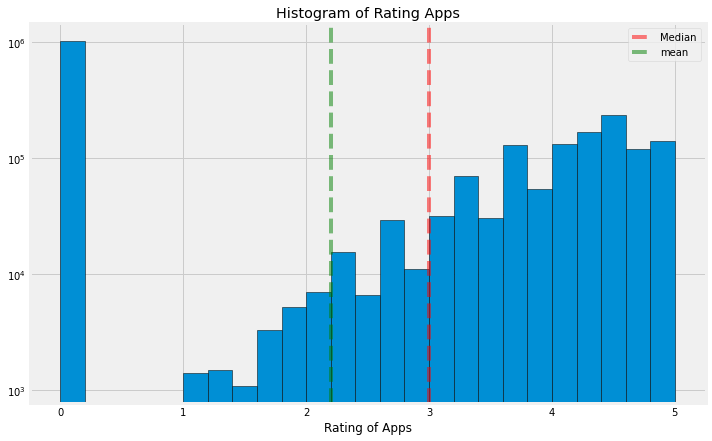

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['Rating'], bins=25, edgecolor='k')
plt.title("Histogram of Rating Apps")
plt.yscale('log')
plt.axvline(np.median(df['Rating']), linestyle='--', color='r', label='Median', alpha=0.5)
plt.axvline(np.mean(df['Rating']), linestyle='--',color='g', label='mean', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.xlabel('Rating of Apps')

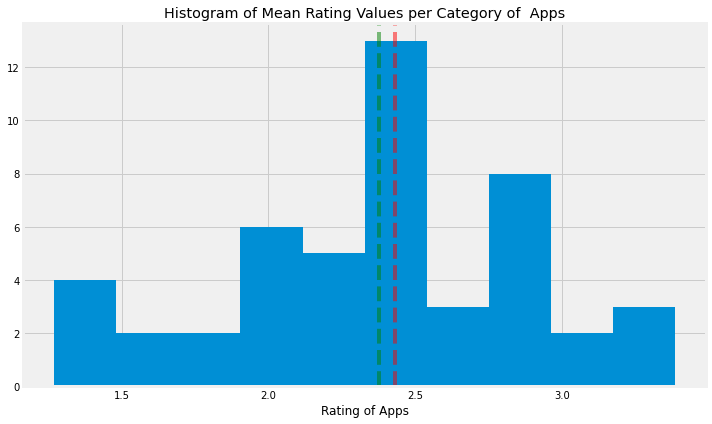

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df_mean['Rating'])
plt.title("Histogram of Mean Rating Values per Category of  Apps")
plt.xlabel("Rating of Apps")
plt.axvline(np.median(df_mean['Rating']), linestyle='--', color='r', label='Median', alpha=0.5)
plt.axvline(np.mean(df_mean['Rating']), linestyle='--',color='g', label='mean', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
rating_by_cat = df_mean['Rating'].sort_values(ascending=False)

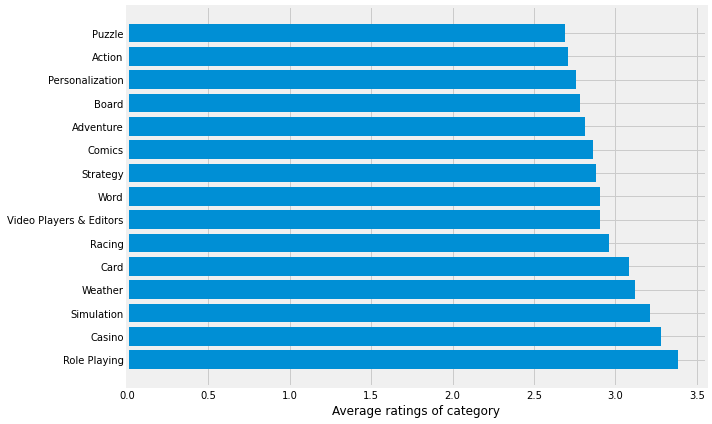

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(y=rating_by_cat[:15].index, width=rating_by_cat[:15])
plt.xlabel("Average ratings of category")
plt.tight_layout()
plt.show()

### Rating Count

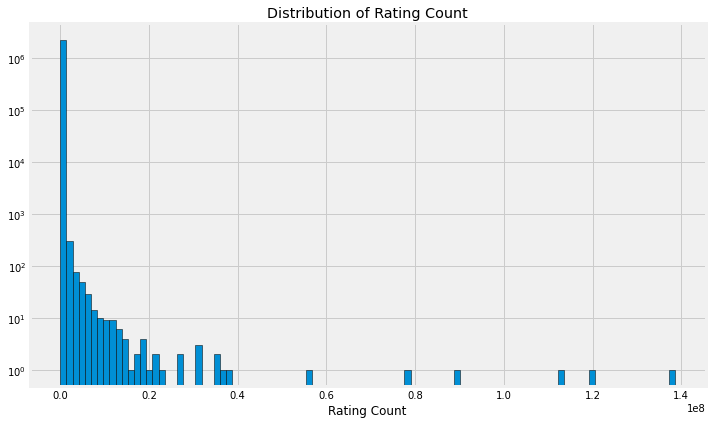

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df["Rating Count"], bins=100, edgecolor='k')
# plt.axvline(np.median(df['Rating Count']), linestyle='--', color='r', label='Median', alpha=0.5)
# plt.axvline(np.mean(df['Rating Count']), linestyle='--',color='g', label='mean', alpha=0.5)
plt.title('Distribution of Rating Count')
plt.yscale('log')
plt.xlabel('Rating Count')
plt.tight_layout()
plt.show()

In [ ]:
df['Rating Count'].describe()

count    2.235278e+06
mean     2.759912e+03
std      1.987596e+05
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+00
75%      4.200000e+01
max      1.385576e+08
Name: Rating Count, dtype: float64

In [ ]:
less_rating_count = df[df["Rating Count"] < 60]["Rating Count"]
len(less_rating_count)* 100/ len(df)

78.34224646777716

In [ ]:
more_than_million = df[df["Rating Count"] > 1e6 ]
len(more_than_million) * 100 / len(df)

0.0351634114414404

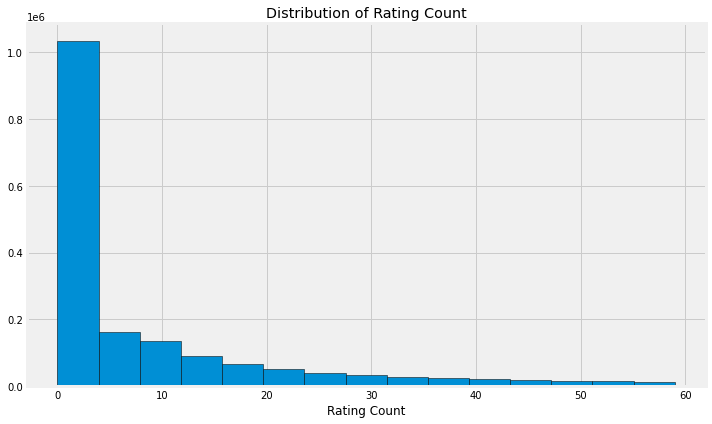

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(less_rating_count, bins=15, edgecolor='k')
# plt.axvline(np.median(df['Rating Count']), linestyle='--', color='r', label='Median', alpha=0.5)
# plt.axvline(np.mean(df['Rating Count']), linestyle='--',color='g', label='mean', alpha=0.5)
plt.title('Distribution of Rating Count')
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Rating Count')
plt.tight_layout()
plt.show()

In [ ]:
rating_count_by_cat_mm = more_than_million.groupby("Category")["Rating Count"].agg('count')

In [ ]:
sort_rating_count_mm = rating_count_by_cat_mm.sort_values(ascending=False)

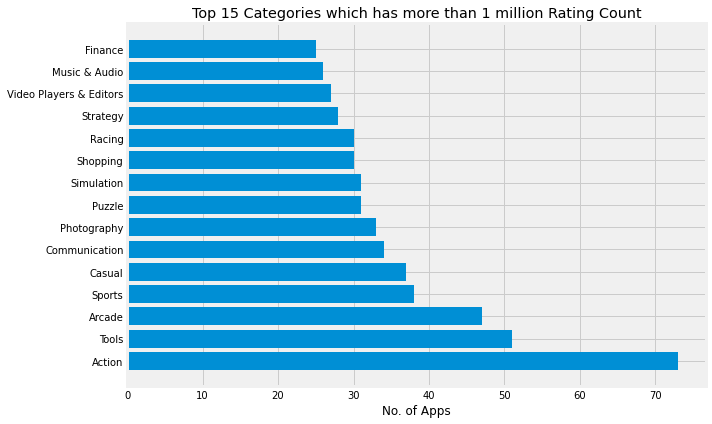

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(y=sort_rating_count_mm[:15].index, width=sort_rating_count_mm[:15])
plt.title("Top 15 Categories which has more than 1 million Rating Count")
plt.xlabel("No. of Apps")
plt.tight_layout()
plt.show()

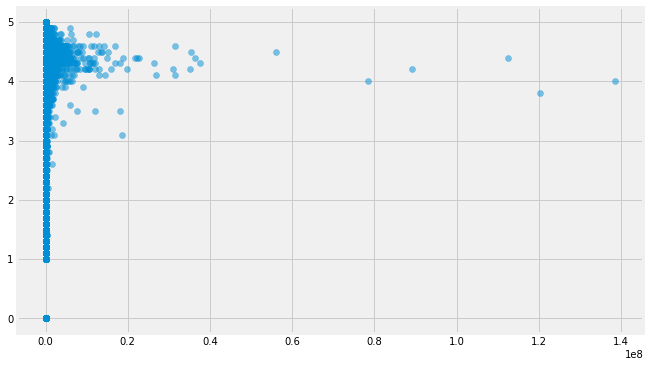

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y =df["Rating"], x =df["Rating Count"], alpha=0.5)
y_labels = [1, 10, 50, 100, 200, 500, 1000, 5000, 10000, 50000, 100000]
# plt.xscale('log')
# plt.legend()

In [ ]:
df.head()

,App Name,Category,Rating,Rating Count,Free,Price,Currency,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Install No.
0,Gakondo,Adventure,0.0,0,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,12.5
1,Ampere Battery Info,Tools,4.4,64,True,0.0,USD,2.9M,5.0 and up,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False,6331.0
2,Vibook,Productivity,0.0,0,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,54.0
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,14.5
4,GROW.me,Tools,0.0,0,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,289.0


### Year


In [ ]:
yearly_released = df["Released"].dt.year.value_counts() 

In [ ]:
yearly_updates = df["Last Updated"].dt.year.value_counts() 

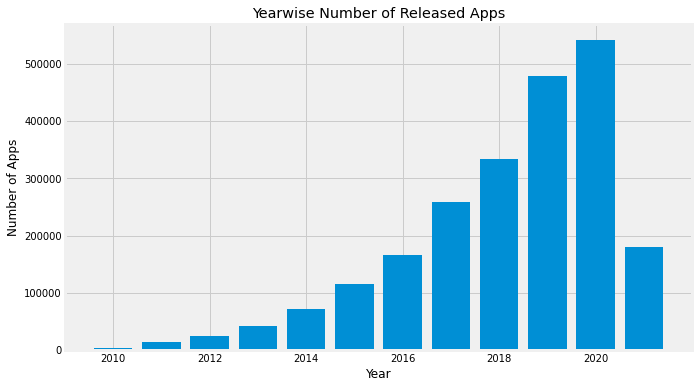

In [ ]:
plt.figure(figsize=(10,6))
# width = 0.25
plt.bar(yearly_released.index, yearly_released, Label="Released Apps")
# plt.bar(yearly_updates.index + width, yearly_updates, width= 0.5,  Label="Last Updated Apps")
plt.title("Yearwise Number of Released Apps")
plt.xlabel("Year")
plt.ylabel("Number of Apps")
# plt.tight_layout()
plt.show()


In [ ]:
yearly_installs = df.groupby(df["Released"].dt.year)['Install No.'].agg('sum')

<BarContainer object of 12 artists>

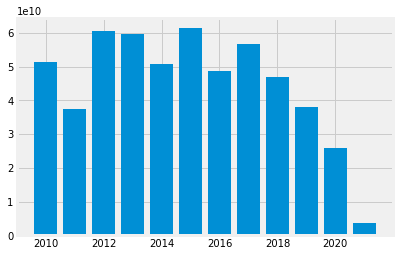

In [ ]:
plt.bar(yearly_installs.index, yearly_installs)

In [ ]:
yearly_data =  df.groupby(df["Released"].dt.year)
year_2020 = yearly_data.get_group(2020)

In [ ]:
print(year_2020.shape[0]*100 / len(df))
print(year_2020.shape[0])

24.261590728312093
542314


In [ ]:
cat_2020 = year_2020.Category.value_counts()

<BarContainer object of 10 artists>

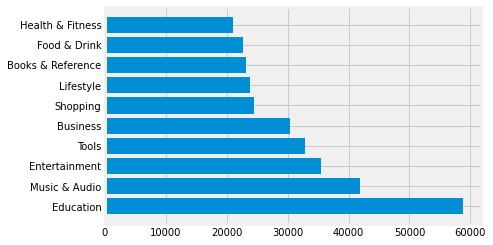

In [ ]:
plt.barh(y=cat_2020.index[:10], width=cat_2020[:10])

In [ ]:
month_released = year_2020["Released"].dt.month.value_counts() 

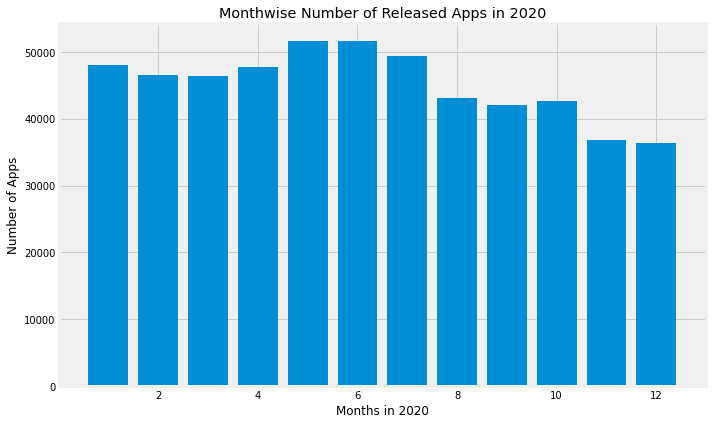

In [ ]:
plt.figure(figsize=(10,6))
# width = 0.25
plt.bar(month_released.index, month_released, Label="Released Apps")
# plt.bar(yearly_updates.index + width, yearly_updates, width= 0.5,  Label="Last Updated Apps")
plt.title("Monthwise Number of Released Apps in 2020")
plt.xlabel("Months in 2020")
plt.ylabel("Number of Apps")
plt.tight_layout()
plt.show()

In [ ]:
cat_installs = year_2020.groupby('Category')['Install No.'].agg(np.sum).sort_values(ascending=False)

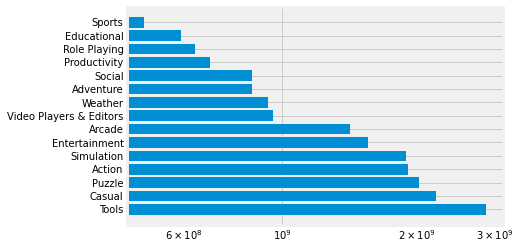

In [ ]:
plt.barh(cat_installs.index[:15],  cat_installs[:15])
plt.xscale('log')

In [ ]:
cat_rating = year_2020.groupby('Category')['Rating'].agg(np.mean).sort_values(ascending=False)

In [ ]:
cat_rating

Category
Role Playing               3.145144
Simulation                 3.052948
Weather                    2.968587
Music                      2.876143
Video Players & Editors    2.854594
Casino                     2.848868
Adventure                  2.615634
Card                       2.614241
Racing                     2.603303
Comics                     2.564718
Dating                     2.529269
Strategy                   2.516928
Word                       2.507171
Action                     2.497183
Trivia                     2.422842
Personalization            2.390536
Entertainment              2.337906
Board                      2.336662
Puzzle                     2.321786
Arcade                     2.228376
Social                     2.198847
Casual                     2.142419
Libraries & Demo           2.112553
Tools                      2.069404
Education                  2.044746
Finance                    2.020874
News & Magazines           2.002280
Art & Design       

## Ask & Answer Question 

1. Something is not right with data column rating count because around 75% of the data below the 42 rating count ???
2. How many application category are there in dataset ??
3. Compair free apps and not free apps 
   - Only around 2% of the apps into dataset are paid apps.
4. Which category has most paid apps ?
5. Which category has most free apps?
6. Which category apps most number of editor choice apps ?
7. Classify apps into content rating


## Summary and Conclusion